# Customer Churn
Project Overview: In this project, we developed a predictive model to identify customers who are likely to churn, enabling businesses to take proactive measures to retain them. Customer churn, the phenomenon where customers stop using a product or service, is a critical issue that directly impacts a company's revenue and growth. Predicting churn allows businesses to understand customer behavior and implement targeted strategies for retention.

Objective: The goal was to build an accurate, interpretable Logistic Regression model to classify customers as "likely to churn" or "not likely to churn," based on various behavioral and demographic features. This project aims to provide actionable insights that could help improve customer retention and reduce churn rates.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)

In [2]:
# Load the datasets

df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# check null values

df.isnull().sum().sum()

0

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df= df.dropna()

In [10]:
# Convert 'TotalCharges' to numeric (float), coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now, if you want to convert to int, you can do this (after handling decimals):
df['TotalCharges'] = df['TotalCharges'].fillna(0).astype(float)  # Convert to float first

# Finally, convert to int if necessary
df['TotalCharges'] = df['TotalCharges'].astype(int)

print(df['TotalCharges'].head())


0      29
1    1889
2     108
3    1840
4     151
Name: TotalCharges, dtype: int32


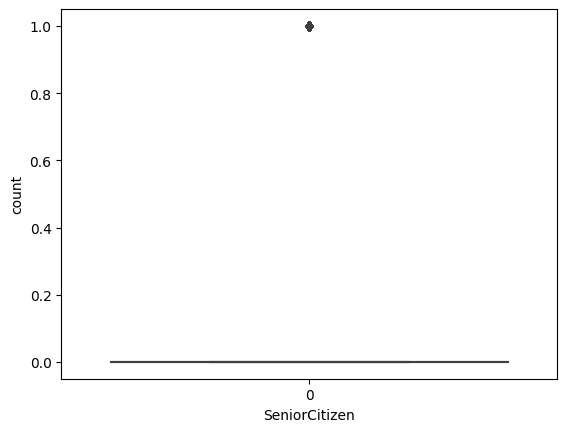

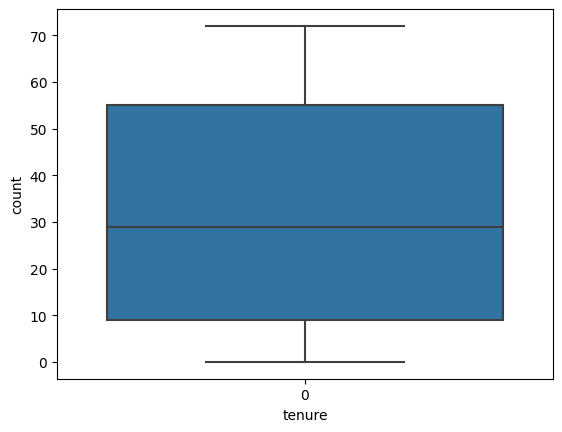

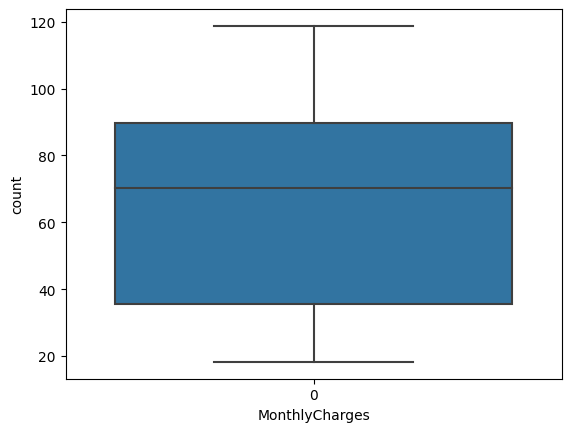

In [11]:
# Box plot visualization of numerical columns

for col in df.columns:
    if ((df[col].dtype == "int64") or (df[col].dtype == "float64")):
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

In [12]:
# Converting text into number by LabelEncoder

le = LabelEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151,1


In [15]:
# X Independent variables

X = df.drop('Churn',axis = 'columns')

In [16]:
# y target variable

y = df.Churn

# RFE
Recursive Feature Elimination (RFE) is a feature selection technique in machine learning that helps to identify and select the most important features in a dataset. It is commonly used to improve the performance and interpretability of models by reducing the number of input variables.

By removing unnecessary features, your model can perform better and faster.



In [17]:
from sklearn.feature_selection import RFE

In [18]:
model = LogisticRegression()

In [19]:
rfe = RFE(model)

In [20]:
rfe.fit(X,y)

c:\users\nishanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\users\nishanth\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

RFE(estimator=LogisticRegression())

In [21]:
rfe.support_

array([False, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False])

In [22]:
# Selecting best features for our model

X = X[['SeniorCitizen','tenure','PaperlessBilling','Contract','TechSupport','MultipleLines','PhoneService','OnlineSecurity']]

In [23]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29,0


In [24]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,-0.003334,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.000377,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000079,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103008,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317503,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826179,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113213,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452576,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175756,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253223,-0.289309


In [25]:
model = LogisticRegression()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

In [27]:
model.fit(X,y)

LogisticRegression()

In [44]:
y_predict = model.predict(X_test)

In [47]:
# Prediction
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
model.score(X_test, y_test)

0.7821149751596878

# Evaluation Metrics
Logiestic Regression, Decision Tree Classifier, Random Forest Classifier

In [30]:
# Logistic Regression

from sklearn.metrics import *

accuracy = accuracy_score(y_test, y_pre)
precision = precision_score(y_test, y_pre)
recall = recall_score(y_test, y_pre)
f1 = f1_score(y_test, y_pre)
conf_matrix = confusion_matrix(y_test, y_pre) 

In [31]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n {conf_matrix}')

Accuracy: 0.7821149751596878
Precision: 0.632996632996633
Recall: 0.48704663212435234
F1-Score: 0.5505124450951685
Confusion Matrix:
 [[914 109]
 [198 188]]


In [32]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 10)

In [33]:
dt.fit(X,y)

DecisionTreeClassifier(random_state=10)

In [34]:
y_pred_dt = dt.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

In [36]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n {conf_matrix}')

Accuracy: 0.8530872959545777
Precision: 0.7770897832817337
Recall: 0.6502590673575129
F1-Score: 0.7080394922425952
Confusion Matrix:
 [[951  72]
 [135 251]]


In [37]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators = 50)

In [39]:
rf.fit(X,y)

RandomForestClassifier(n_estimators=50)

In [40]:
y_pred_rf = rf.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [42]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n {conf_matrix}')

Accuracy: 0.8573456352022711
Precision: 0.7665706051873199
Recall: 0.689119170984456
F1-Score: 0.7257844474761255
Confusion Matrix:
 [[942  81]
 [120 266]]
